In [79]:
%pylab inline
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [59]:
font = {'size':25, 'family':'serif'}
matplotlib.rc('font', **font)

# Defining constants

In [191]:
Mpc = constants.pc.value*1000000 #m
Kpc = Mpc/1000.0
G = constants.G
G = G.value # m3/kgs2
K = constants.k_B
K = K.value # J/K
M_s = constants.M_sun.value #kg
mu_m = 0.59 # from makino et al.
m_p = 1.672621777e-27# proton mass kg
Omega_m = 0.3089
Omega_b = 0.02230/0.7**2
Omega_l = 0.6911
Omega_k = 1 - 1.0023
H_0 = 67740 # m/sMpc
H_0m = H_0/Mpc
#H = H_0*sqrt(Omega_r + Omega_m + Omega_k + Omega_l)
p_cr = 3*H_0m**2/(8*pi*G) # kg/m3
beta = 0.4 # Makino page 8
print H_0m, G, K, p_cr, m_p, Mpc

2.19530389069e-18 6.67384e-11 1.3806488e-23 8.61975453599e-27 1.672621777e-27 3.08567758147e+22


$\alpha = \dfrac{9 \beta k_B \Omega_m}{800 \pi G \mu_n m_p \Omega_B \rho_{c}} = 2.3644\times 10^{38}[m^2/K]
$

# Computing $\alpha$ and $\alpha'$ values

In [161]:
a = 9*beta*K*Omega_m/(200.0*p_cr*4.0*pi*G*mu_m*m_p*Omega_b)
a_prime = a * 7.0*2554.0/(31.0*(1000000)**(2/3.))
print "a = ",  a
print "a'= ", a_prime

a =  2.36447397595e+38
a'=  1.36361502394e+37


# Defining functions to compute $c$ and $r_c$

In [206]:
def c(M, a, rvir):
    C = 1 / (sqrt((a*M**(2/3.)/rvir**2) - 1))
    return C
def r_c(a, M, r_vir):
    r_c = sqrt(a*M**(2/3.) - r_vir**2)
    return r_c

# Generationg mass ranges

In [163]:
M_1 = linspace(20, 37, 10)
M = exp(M_1)
z = ones(10)
print min(M), max(M), exp(15)*10
len(z), len(M)

485165195.41 1.17191423728e+16 32690173.7247


(10, 10)

# writting input data of rvir code

In [164]:
f = open("rvir_in.dat", 'w')
for i in range(len(M)):
    f.write(("%f \t %f\n") %(M[i], z[i]))
f.close()
#rvir = np.zeros([100])

# running rvir code

In [ ]:
!./rvirmod/a.out 10 > rvir_outiii.dat

## This data come from code/rvir

In [215]:
data = loadtxt("rvir_outiii.dat")
R = data[:,0]*0.7*Kpc # the virial radius is in Kpc*h
print (min(R), max(R)), min(M)**(2/3.), a_prime

(2.0481308374091747e+20, 5.9201871791581167e+22) 617437.626912 1.36361502394e+37


In [223]:
a_prime*M**(2/3.)/(R)**2

array([ 200.71021517,  200.71216004,  200.71500719,  200.71774638,
        200.72036502,  200.72264379,  200.7249577 ,  200.72809614,
        200.73003547,  200.73269789])

# computing C_1 and r_c 

In [219]:
#checking numbers
C_1 = c(M, a_prime, R)
r_C = r_c(1, M, R)
print min(M), max(M)
print min(R), max(R)
print min(C_1), max(C_1)
#print C_min, C_max, C
print log10(max(C_1))

485165195.41 1.17191423728e+16
2.04813083741e+20 5.92018717916e+22
0.0707579783199 0.070761961058
-1.1502001398


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


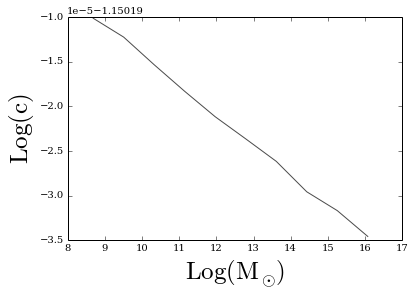

In [232]:
plot(log10(M), log10(C_1), alpha=0.7, c='k')
xlabel(r"$\mathrm{Log(M_{\odot})}$", fontsize=25)
ylabel(r"$\mathrm{Log(c)}$", fontsize=25)
gca().get_yaxis().get_major_formatter().set_powerlimits((0, 0))
savefig("c_vs_m.png", bbox_inches='tight')
